In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lower_none = np.array([0, 0, 0])
upper_none = np.array([255, 255, 255])

lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

lower_green = np.array([35, 100, 100])
upper_green = np.array([90, 255, 255])

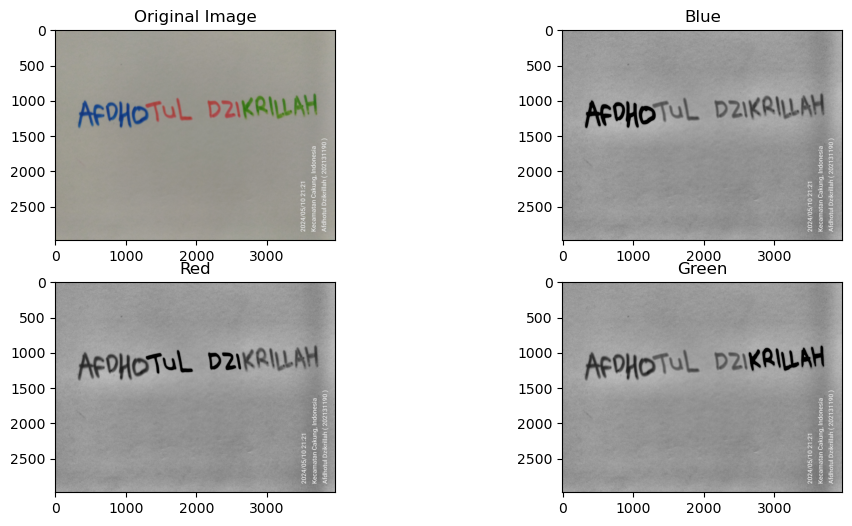

In [3]:
img = cv.imread('image.jpg')

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

mask_none = cv.inRange(hsv_img, lower_none, upper_none)

mask_blue = cv.inRange(hsv_img, lower_blue, upper_blue)

mask_red1 = cv.inRange(hsv_img, lower_red1, upper_red1)
mask_red2 = cv.inRange(hsv_img, lower_red2, upper_red2)
mask_red = mask_red1 + mask_red2

mask_green = cv.inRange(hsv_img, lower_green, upper_green)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrasted_image_blue = cv.merge([clahe.apply(gray)] * 3)
contrasted_image_red = cv.merge([clahe.apply(gray)] * 3)
contrasted_image_green = cv.merge([clahe.apply(gray)] * 3)

black_color = np.array([0, 0, 0])

contrasted_image_blue[mask_blue == 255] = black_color
contrasted_image_red[mask_red == 255] = black_color
contrasted_image_green[mask_green == 255] = black_color

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(contrasted_image_blue, cv.COLOR_BGR2RGB))
plt.title('Blue')

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(contrasted_image_red, cv.COLOR_BGR2RGB))
plt.title('Red')

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(contrasted_image_green, cv.COLOR_BGR2RGB))
plt.title('Green')

plt.show()

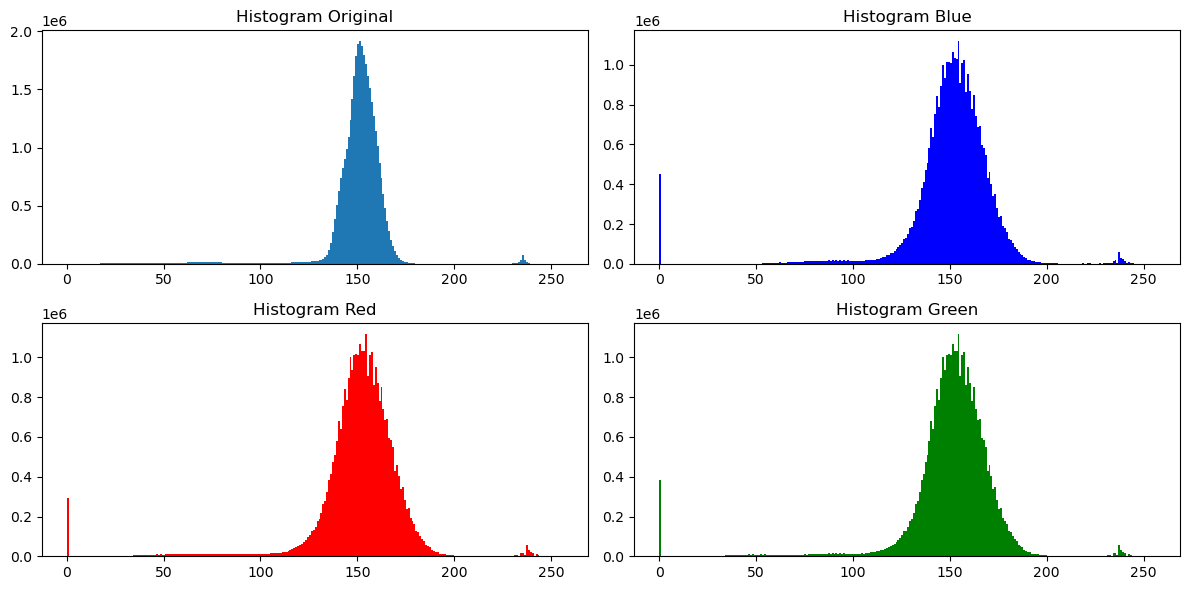

In [4]:
plt.figure(figsize=(12, 6))

# Original Image Histogram
plt.subplot(2, 2, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram Original')

# Blue Histogram
plt.subplot(2, 2, 2)
plt.hist(contrasted_image_blue.ravel(), 256, [0, 256], color='blue')
plt.title('Histogram Blue')

# Red Histogram
plt.subplot(2, 2, 3)
plt.hist(contrasted_image_red.ravel(), 256, [0, 256], color='red')
plt.title('Histogram Red')

# Green Histogram
plt.subplot(2, 2, 4)
plt.hist(contrasted_image_green.ravel(), 256, [0, 256], color='green')
plt.title('Histogram Green')

plt.tight_layout()
plt.show()

In [5]:
mask_red_blue = mask_blue + mask_red
mask_red_green_blue = mask_blue + mask_green + mask_red

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(mask_none, cmap='gray')
plt.title('None')

plt.subplot(2, 2, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title('Blue')

plt.subplot(2, 2, 3)
plt.imshow(mask_red_blue, cmap='gray')
plt.title('Red-Blue')

plt.subplot(2, 2, 4)
plt.imshow(mask_red_green_blue, cmap='gray')
plt.title('Red-Green-Blue')

plt.show()